# CreditOne

### Selecting and Dividing Data

#### Import Modules

In [187]:
# imports

# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE



# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# cross validation
#from sklearn.cross_validation import train_test_split  # cross_validation deprecated
from sklearn.model_selection import train_test_split

# Ignore Future Warnings (FutureWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#### Data Structure

In [188]:
# data

credit = pd.read_csv('default of credit card clients.csv', header=1)
credit.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [189]:
# Examine structure of the data 

credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [190]:
# Checking for NULL Values

if credit is None:
    print('There are null values')
else:
    print('There are no null values')


There are no null values


In [191]:
# Listing attributes of rawData dataframe

np.transpose(credit)

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
ID,1,2,3,4,5,6,7,8,9,10,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,30000
LIMIT_BAL,20000,120000,90000,50000,50000,50000,500000,100000,140000,20000,...,140000,210000,10000,100000,80000,220000,150000,30000,80000,50000
SEX,2,2,2,2,1,1,1,2,2,1,...,1,1,1,1,1,1,1,1,1,1
EDUCATION,2,2,2,2,2,1,1,2,3,3,...,2,2,3,1,2,3,3,2,3,2
MARRIAGE,1,2,2,1,1,2,2,2,1,2,...,1,1,1,2,2,1,2,2,1,1
AGE,24,26,34,37,57,37,29,23,28,35,...,41,34,43,38,34,39,43,37,41,46
PAY_0,2,-1,0,0,-1,0,0,0,0,-2,...,0,3,0,0,2,0,-1,4,1,0
PAY_2,2,2,0,0,0,0,0,-1,0,-2,...,0,2,0,-1,2,0,-1,3,-1,0
PAY_3,-1,0,0,0,-1,0,0,-1,2,-2,...,0,2,0,-1,2,0,-1,2,0,0
PAY_4,-1,0,0,0,0,0,0,0,0,-2,...,0,2,-2,0,2,0,-1,-1,0,0


#### Cleaning and Pre-processing

In [192]:
# Removing the ID column

del credit['ID']
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [193]:
# Check unique values for categorical variables

print('Unique Values')
print('SEX ' + str(sorted(credit['SEX'].unique())))
print('EDUCATION ' + str(sorted(credit['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(credit['MARRIAGE'].unique())))
print('PAY_0 ' + str(sorted(credit['PAY_0'].unique())))
print('PAY_2 ' + str(sorted(credit['PAY_2'].unique())))
print('PAY_3 ' + str(sorted(credit['PAY_3'].unique())))
print('PAY_4 ' + str(sorted(credit['PAY_4'].unique())))
print('PAY_5 ' + str(sorted(credit['PAY_5'].unique())))
print('PAY_6 ' + str(sorted(credit['PAY_6'].unique())))
print('default.payment.next.month ' + str(sorted(credit['default payment next month'].unique())))


Unique Values
SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]
PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
default.payment.next.month [0, 1]


In [194]:
# Convert/Group values for Education - Assign value of '4' to the records with values 0, 5, 6 for EDUCATION
# Values for “Others” in Education attribute are: 0, 4, 5, 6 (not well defined)

# Check for records with values 0, 5 or 6 for EDUCATION attribute

others = (credit.EDUCATION == 0) | (credit.EDUCATION == 5) | (credit.EDUCATION == 6)
credit.loc[others, 'EDUCATION']

47       5
69       5
385      5
502      6
504      6
        ..
29811    5
29836    6
29839    5
29920    5
29966    5
Name: EDUCATION, Length: 345, dtype: int64

In [195]:
# Assign value of '4' to the records with values 0, 5, 6 for EDUCATION

others = (credit.EDUCATION == 0) | (credit.EDUCATION == 5) | (credit.EDUCATION == 6)
credit.loc[others, 'EDUCATION'] = 4


In [196]:
# Verify values for EDUCATION have been converted to 4, no values 0, 5 or 6 for EDUCATION attribute

others = (credit.EDUCATION == 0) | (credit.EDUCATION == 5) | (credit.EDUCATION == 6)
credit.loc[others, 'EDUCATION']


Series([], Name: EDUCATION, dtype: int64)

In [197]:
# Verify value of '4' for 'others' in EDUCATION attribute

others4 = (credit.EDUCATION == 4)
credit.loc[others4, 'EDUCATION']


47       4
69       4
358      4
385      4
448      4
        ..
29836    4
29839    4
29847    4
29920    4
29966    4
Name: EDUCATION, Length: 468, dtype: int64

In [198]:
# Print unique values for EDUCATION

print('EDUCATION: ' + str(sorted(credit['EDUCATION'].unique())))


EDUCATION: [1, 2, 3, 4]


In [199]:
# Rename column "PAY_0" to "PAY_1" to match corresponding fields:
# i.e ("PAY_2", "PAY_3"....."PAY_6") or ("BILL_AMT1" and "PAY_AMT1")  

credit = credit.rename(columns={"PAY_0": "PAY_1"}) 


In [200]:
# Rename column "default payment next month" to a shorter meaningful name of "DEFAULT"

credit = credit.rename(columns={"default payment next month": "DEFAULT"}) 


In [201]:
# Verify the name of the columns have been changed

list(credit.columns.values)


['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DEFAULT']

We are interested in DEFAULT payment. We can group the folowing scales in one
since those represent good payment: 
-2 = No consumption, -1 = Paid in full, 0 = The use of revolving credit



In [202]:
# Grouping values for -2, -1, 0 in one group '0'

pay = (credit.PAY_1 == -1) | (credit.PAY_1==-2)
credit.loc[pay,'PAY_1']=0
credit.PAY_1.value_counts()
pay = (credit.PAY_2 == -1) | (credit.PAY_2==-2)
credit.loc[pay,'PAY_2']=0
credit.PAY_2.value_counts()
pay = (credit.PAY_3 == -1) | (credit.PAY_3==-2)
credit.loc[pay,'PAY_3']=0
credit.PAY_3.value_counts()
pay = (credit.PAY_4 == -1) | (credit.PAY_4==-2)
credit.loc[pay,'PAY_4']=0
credit.PAY_4.value_counts()
pay = (credit.PAY_5 == -1) | (credit.PAY_5==-2)
credit.loc[pay,'PAY_5']=0
credit.PAY_5.value_counts()
pay = (credit.PAY_6 == -1) | (credit.PAY_6==-2)
credit.loc[pay,'PAY_6']=0
credit.PAY_6.value_counts()


0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

#### Visualizing the Data

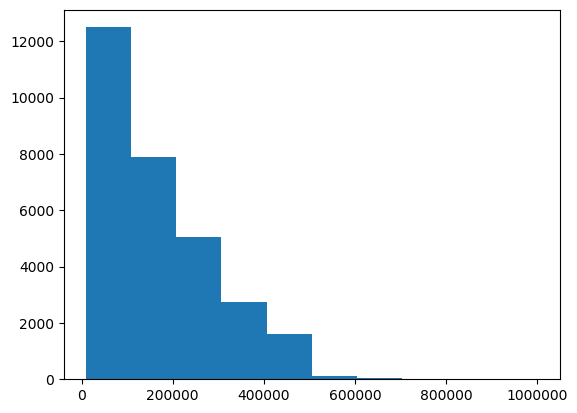

In [203]:
# Histogram of 'LIMIT_BAL'

plt.hist(credit['LIMIT_BAL'])
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

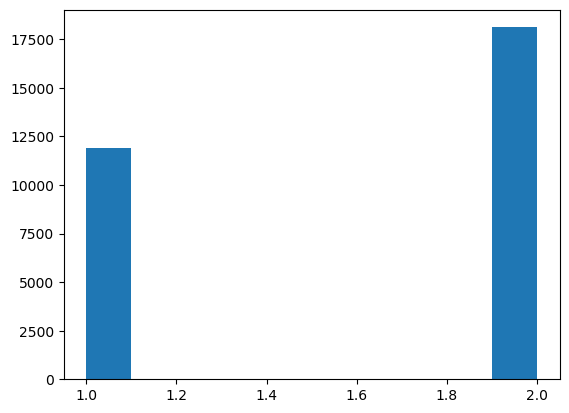

In [204]:
# Histogram of 'SEX'

plt.hist(credit['SEX'])
plt.show


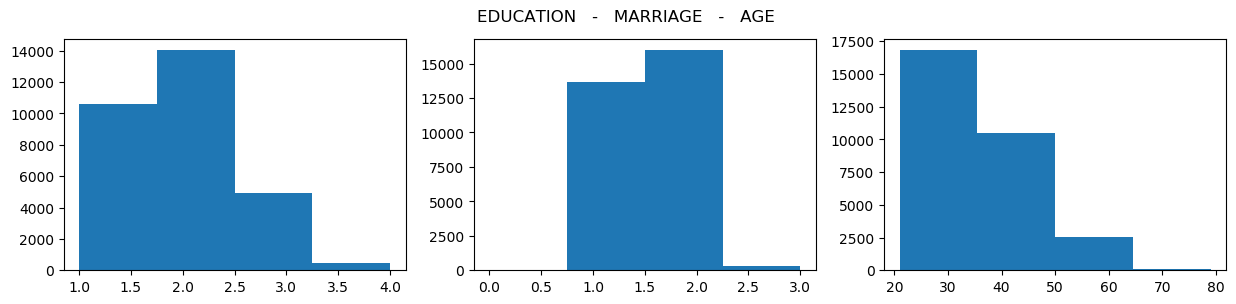

In [205]:
# Visualizing EDUCATION, MARRIAGE and AGE

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.hist(credit['EDUCATION'], bins=4)
plt.subplot(132)
plt.hist(credit['MARRIAGE'], bins=4)
plt.subplot(133)
plt.hist(credit['AGE'], bins=4)
plt.suptitle('EDUCATION   -   MARRIAGE   -   AGE')
plt.show()


Text(0.5, 1.0, 'Default Credit Card Clients \n Default = 0, Not Default = 1')

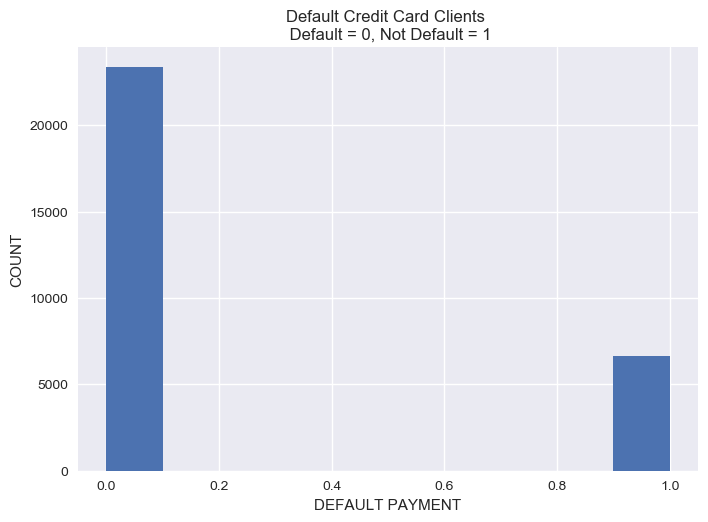

In [207]:
# Visualizing DEFAULT Payment

plt.style.use('seaborn')
credit['DEFAULT'].hist()
plt.xlabel('DEFAULT PAYMENT')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients \n Default = 0, Not Default = 1')


In [208]:
# Reset to original matplotlib.pyplot style

plt.rcParams.update(plt.rcParamsDefault)


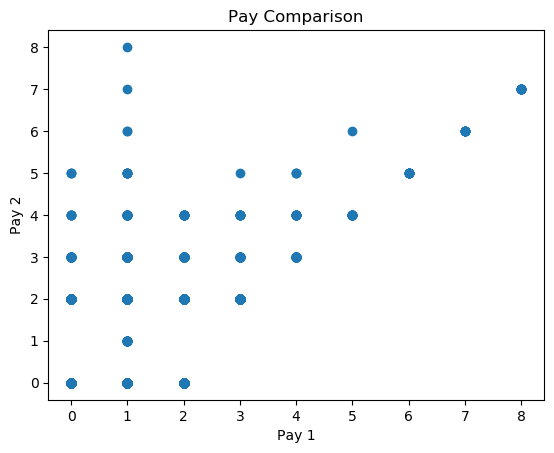

In [209]:
# Scatter plots

x = credit['PAY_1']
y = credit['PAY_2']
plt.scatter(x,y)
plt.title("Pay Comparison")
plt.xlabel("Pay 1")
plt.ylabel("Pay 2")
plt.show()


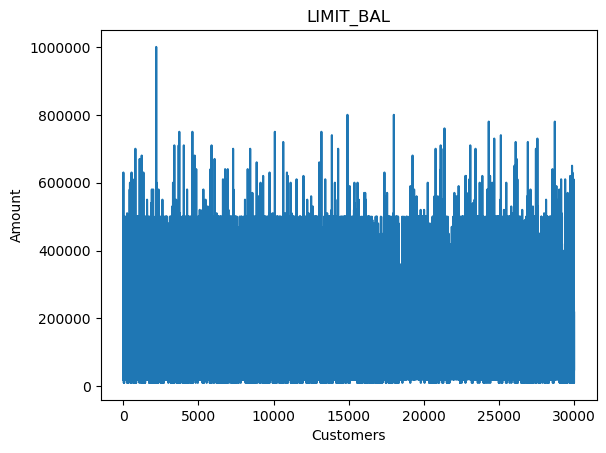

In [210]:
# Line Plots
# Added title and labels

plt.plot(credit['LIMIT_BAL'])
plt.title("LIMIT_BAL")
plt.xlabel("Customers")
plt.ylabel("Amount")
plt.show()


In [211]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]

In [212]:
# Reset to original matplotlib.pyplot style

plt.rcParams.update(plt.rcParamsDefault)


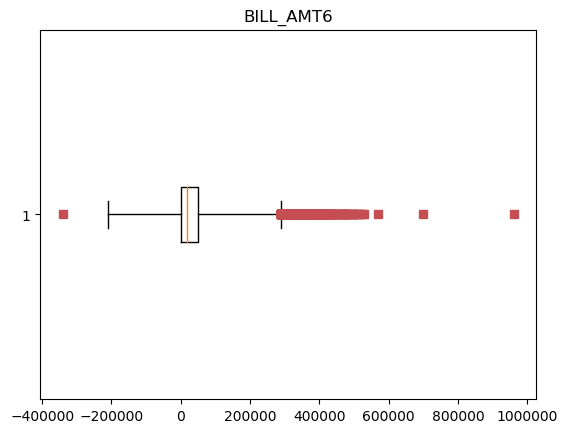

In [213]:
# Plot BILL_AMT6 horizontal 

B = credit["BILL_AMT6"]
plt.boxplot(B,0,'rs',0, 5)
plt.title("BILL_AMT6")

plt.show()


#### Covariance Estimation

In [214]:
# Covariance coefficient matrix

covMat = credit.cov()
print(covMat)


              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22322.227579 -7323.669658   
SEX        1.571051e+03     0.239247      0.004962    -0.008014   
EDUCATION -2.232223e+04     0.004962      0.554272    -0.057954   
MARRIAGE  -7.323670e+03    -0.008014     -0.057954     0.272452   
AGE        1.730767e+05    -0.409726      1.251988    -1.992764   
PAY_1     -1.684999e+04    -0.012826      0.031675    -0.004654   
PAY_2     -2.050652e+04    -0.017549      0.037448    -0.004149   
PAY_3     -1.962539e+04    -0.015942      0.031229     0.000296   
PAY_4     -1.783762e+04    -0.014793      0.029017    -0.001605   
PAY_5     -1.583497e+04    -0.013527      0.021172    -0.001039   
PAY_6     -1.557815e+04    -0.011220      0.015271     0.000765   
BILL_AMT1  2.727020e+09 -1211.694332    909.885257  -902.154685   
BILL_AMT2  2.570130e+09 -1085.595467    634.798683  -802.517866   
BILL_AMT3  2.548533e+09  -833.207432    346.636738  -901.67908

In [215]:
# Covariance coefficient matrix - Selecting specific features/variables to measure - Using iloc"
# Selecting 4 features/variables

covMat = credit.cov()
print(covMat.iloc[0:4])


              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22322.227579 -7323.669658   
SEX        1.571051e+03     0.239247      0.004962    -0.008014   
EDUCATION -2.232223e+04     0.004962      0.554272    -0.057954   
MARRIAGE  -7.323670e+03    -0.008014     -0.057954     0.272452   

                     AGE         PAY_1         PAY_2         PAY_3  \
LIMIT_BAL  173076.722569 -16849.985183 -20506.516281 -19625.387225   
SEX            -0.409726     -0.012826     -0.017549     -0.015942   
EDUCATION       1.251988      0.031675      0.037448      0.031229   
MARRIAGE       -1.992764     -0.004654     -0.004149      0.000296   

                  PAY_4         PAY_5  ...     BILL_AMT4     BILL_AMT5  \
LIMIT_BAL -17837.621149 -15834.971970  ...  2.453926e+09  2.331481e+09   
SEX           -0.014793     -0.013527  ... -6.884896e+02 -5.056943e+02   
EDUCATION      0.029017      0.021172  ... -2.936362e+02 -5.630082e+02   
MARRIAGE      -0.

In [216]:
# Covariance (Partial) - 4 features/variables

Part = pd.DataFrame(credit, columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE'])

covPart = Part.cov()
print(covPart)                                     
                      

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE
LIMIT_BAL  1.683446e+10  1571.050630 -22322.227579 -7323.669658
SEX        1.571051e+03     0.239247      0.004962    -0.008014
EDUCATION -2.232223e+04     0.004962      0.554272    -0.057954
MARRIAGE  -7.323670e+03    -0.008014     -0.057954     0.272452


In [217]:
# Covariance PAY_X (behavior)

Pay = pd.DataFrame(credit, columns=['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

covPay = Pay.cov()
print(covPay)                                     
                     

          PAY_1     PAY_2     PAY_3     PAY_4     PAY_5     PAY_6
PAY_1  0.578503  0.425870  0.310863  0.266423  0.231717  0.203409
PAY_2  0.425870  0.642767  0.420569  0.312896  0.266255  0.233499
PAY_3  0.310863  0.420569  0.625031  0.408531  0.312893  0.278751
PAY_4  0.266423  0.312896  0.408531  0.579292  0.407197  0.328283
PAY_5  0.231717  0.266255  0.312893  0.407197  0.515122  0.380161
PAY_6  0.203409  0.233499  0.278751  0.328283  0.380161  0.511851


In [218]:
# Covariance BILL_AMTX 

Bill = pd.DataFrame(credit, columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

covBill = Bill.cov()
print(covBill)  


              BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4  \
BILL_AMT1  5.422240e+09  4.986670e+09  4.556511e+09  4.075286e+09   
BILL_AMT2  4.986670e+09  5.065705e+09  4.582086e+09  4.086508e+09   
BILL_AMT3  4.556511e+09  4.582086e+09  4.809338e+09  4.122238e+09   
BILL_AMT4  4.075286e+09  4.086508e+09  4.122238e+09  4.138716e+09   
BILL_AMT5  3.714795e+09  3.720401e+09  3.726780e+09  3.677105e+09   
BILL_AMT6  3.519876e+09  3.524868e+09  3.524247e+09  3.451762e+09   

              BILL_AMT5     BILL_AMT6  
BILL_AMT1  3.714795e+09  3.519876e+09  
BILL_AMT2  3.720401e+09  3.524868e+09  
BILL_AMT3  3.726780e+09  3.524247e+09  
BILL_AMT4  3.677105e+09  3.451762e+09  
BILL_AMT5  3.696294e+09  3.425914e+09  
BILL_AMT6  3.425914e+09  3.546692e+09  


In [219]:
# Covariance PAY_AMTX 

PayAmt = pd.DataFrame(credit, columns=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

covPayAmt = PayAmt.cov()
print(covPayAmt)      


              PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4  \
PAY_AMT1  2.743423e+08  1.089849e+08  7.354626e+07  5.178189e+07   
PAY_AMT2  1.089849e+08  5.308817e+08  9.929841e+07  6.501168e+07   
PAY_AMT3  7.354626e+07  9.929841e+07  3.100051e+08  5.966970e+07   
PAY_AMT4  5.178189e+07  6.501168e+07  5.966970e+07  2.454286e+08   
PAY_AMT5  3.756893e+07  6.368414e+07  4.282921e+07  3.634098e+07   
PAY_AMT6  5.469033e+07  6.456816e+07  5.093879e+07  4.395747e+07   

              PAY_AMT5      PAY_AMT6  
PAY_AMT1  3.756893e+07  5.469033e+07  
PAY_AMT2  6.368414e+07  6.456816e+07  
PAY_AMT3  4.282921e+07  5.093879e+07  
PAY_AMT4  3.634098e+07  4.395747e+07  
PAY_AMT5  2.334266e+08  4.207110e+07  
PAY_AMT6  4.207110e+07  3.160383e+08  


#### Exploratory Data Analysis

In [220]:
# Explore credit dataset

credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,0.356767,0.760594,0.0,0.00,0.0,0.00,8.0
PAY_2,30000.0,0.320033,0.801727,0.0,0.00,0.0,0.00,8.0
PAY_3,30000.0,0.304067,0.790589,0.0,0.00,0.0,0.00,8.0
PAY_4,30000.0,0.258767,0.761113,0.0,0.00,0.0,0.00,8.0
PAY_5,30000.0,0.221500,0.717720,0.0,0.00,0.0,0.00,8.0


In [221]:
# Number of customer for each SEX level: 1 = male; 2 = female

sexCount = credit.groupby('SEX')['SEX'].count()
sexCount.count


<bound method Series.count of SEX
1    11888
2    18112
Name: SEX, dtype: int64>

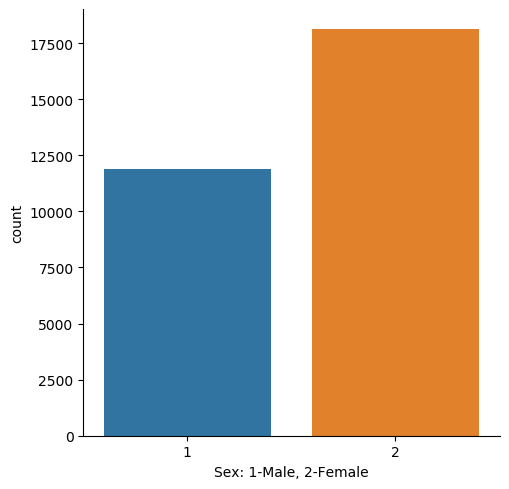

In [222]:
# Using seaborn to plot the count of SEX level

fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.0)
fg.set_xlabels('Sex: 1-Male, 2-Female')


In [223]:
# Number of customer for each EDUCATION level: 1 = graduate school; 2 = university; 3 = high school; 4 = others

educationCount = credit.groupby('EDUCATION')['EDUCATION'].count()
educationCount.count


<bound method Series.count of EDUCATION
1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64>

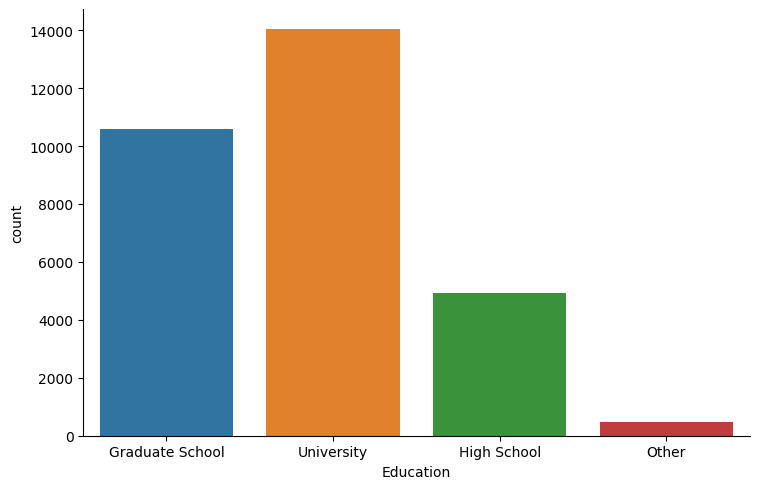

In [224]:
# Using seaborn to plot the count of EDUCATION level

fg = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Education')
fg.set_xticklabels(['Graduate School','University','High School','Other'])


In [225]:
# Number of customer for each MARRIAGE level: 1 = married; 2 = single; 3 = divorce; 0=others

marriageCount = credit.groupby('MARRIAGE')['MARRIAGE'].count()
marriageCount.count


<bound method Series.count of MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64>

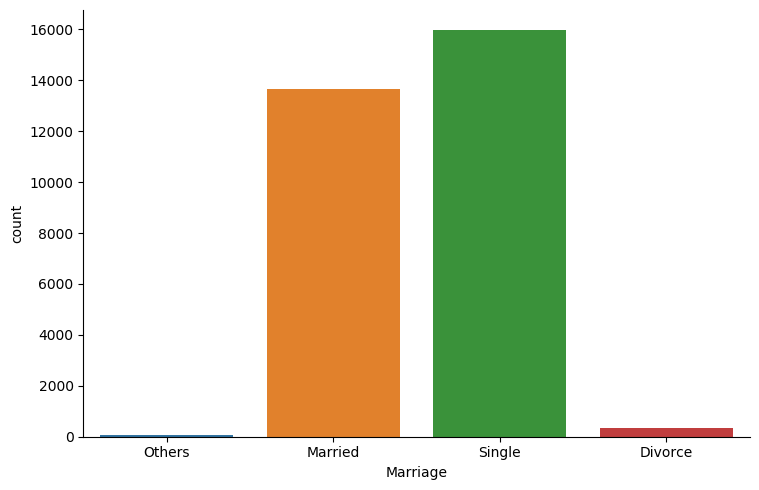

In [226]:
# Using seaborn to plot the count of MARRIAGE level

fg = sns.catplot('MARRIAGE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Marriage')
fg.set_xticklabels(['Others','Married','Single','Divorce'])

In [227]:
# Number of customer for each AGE level

ageCount = credit.groupby('AGE')['AGE'].count()
ageCount.count


<bound method Series.count of AGE
21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64>

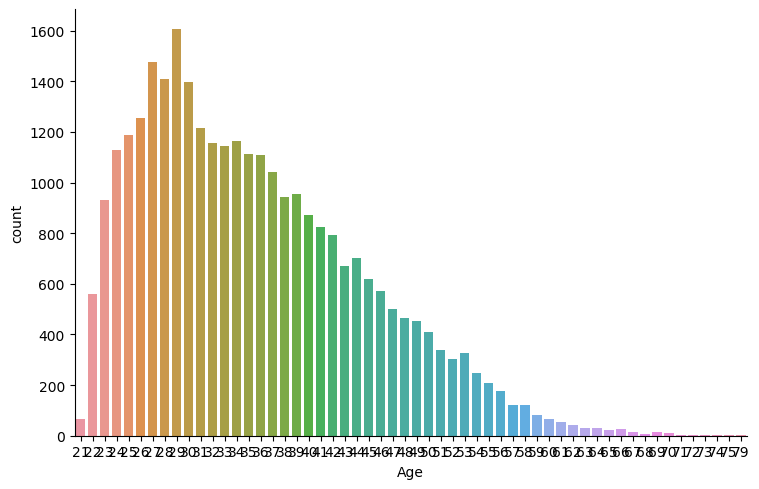

In [228]:
# Using seaborn to plot the count of AGE level

fg = sns.catplot('AGE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Age')


In [229]:
# Number of male and female in each level of EDUCATION

sexeducationCount = credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()
sexeducationCount.count


<bound method Series.count of SEX  EDUCATION
1    1            4354
     2            5374
     3            1990
     4             170
2    1            6231
     2            8656
     3            2927
     4             298
Name: SEX, dtype: int64>

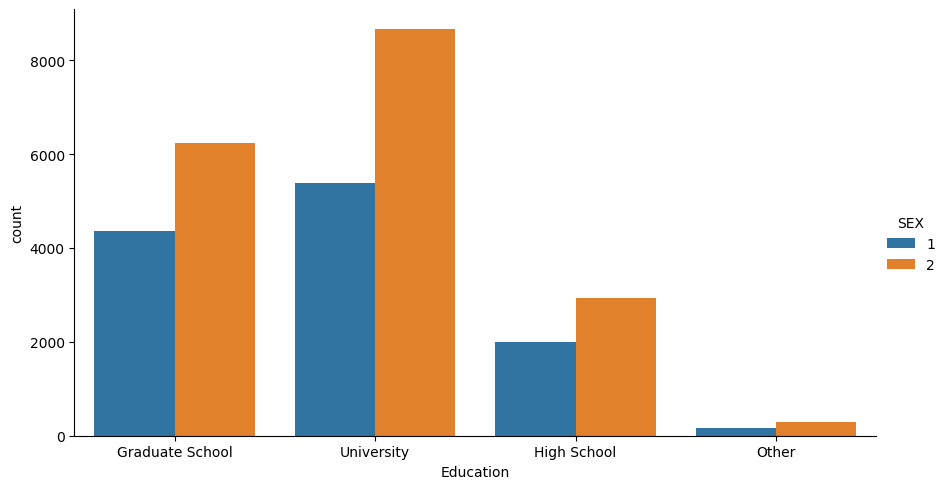

In [230]:
# Plot the SEX by each level of EDUCATION

fg = sns.catplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)
fg.set_xlabels('Education')
fg.set_xticklabels(['Graduate School','University','High School','Other'])


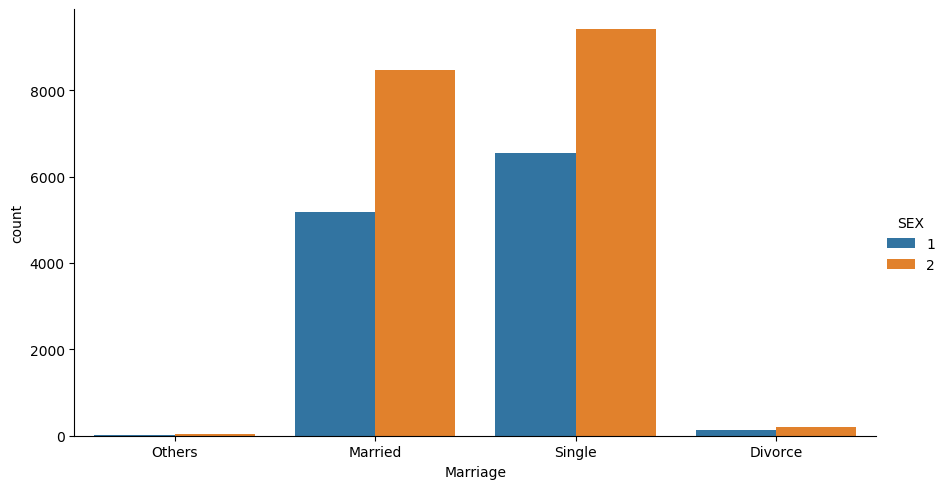

In [231]:
# Plot the SEX by each level of MARRIAGE

fg = sns.catplot('MARRIAGE', data=credit, hue='SEX', kind='count', aspect=1.75)
fg.set_xlabels('Marriage')
fg.set_xticklabels(['Others','Married','Single','Divorce'])


In [232]:
# Pivot Table
# Sum of the LIMIT_BAL group by SEX/EDUCATION 

credit.pivot_table('LIMIT_BAL', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)


EDUCATION,1,2,3,4,All
SEX,,,,,
1,954620000,719590000,240677680,29036000,1943923680
2,1299520000,1343696000,381570000,55820000,3080606000
All,2254140000,2063286000,622247680,84856000,5024529680


In [233]:
# Table Analysis of EDUCATION to DEFAULT

education0 = credit.groupby(credit['EDUCATION'][credit['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
education1 = credit.groupby(credit['EDUCATION'][credit['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
totaleducation = credit.groupby('EDUCATION').size().reset_index(name='TOTAL')

educationTable = education0.join(education1['DEFAULT']).join(totaleducation['TOTAL'])
educationTable['EDUCATION'] = ['Graduate School','University','High School','Other']

educationTable


,EDUCATION,NOT_DEFAULT,DEFAULT,TOTAL
0,Graduate School,8549,2036,10585
1,University,10700,3330,14030
2,High School,3680,1237,4917
3,Other,435,33,468


In [234]:
# Table Analysis of MARRIAGE to DEFAULT

marriage0 = credit.groupby(credit['MARRIAGE'][credit['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
marriage1 = credit.groupby(credit['MARRIAGE'][credit['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
totalmarriage = credit.groupby('MARRIAGE').size().reset_index(name='TOTAL')

marriageTable = marriage0.join(marriage1['DEFAULT']).join(totalmarriage['TOTAL'])
marriageTable['MARRIAGE'] = ['Others','Married','Single','Divorce']

marriageTable


,MARRIAGE,NOT_DEFAULT,DEFAULT,TOTAL
0,Others,49,5,54
1,Married,10453,3206,13659
2,Single,12623,3341,15964
3,Divorce,239,84,323


In [235]:
# Table Analysis of MARRIAGE to SEX

sex0 = credit.groupby(credit['SEX'][credit['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
sex1 = credit.groupby(credit['SEX'][credit['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
totalsex = credit.groupby('SEX').size().reset_index(name='TOTAL')

sexTable = sex0.join(sex1['DEFAULT']).join(totalsex['TOTAL'])
sexTable['SEX'] = ['Male','Female']

sexTable


,SEX,NOT_DEFAULT,DEFAULT,TOTAL
0,Male,9015,2873,11888
1,Female,14349,3763,18112


In [236]:
# Table
# Customers DEFAULT/NOT DEFAULT grouped by EDUCATION and SEX
table = pd.crosstab(index=[credit['DEFAULT'],credit['EDUCATION']], columns=[credit['SEX']])

table.unstack()


SEX           1                      2                 
EDUCATION     1     2     3    4     1     2     3    4
DEFAULT                                                
0          3448  3966  1445  156  5101  6734  2235  279
1           906  1408   545   14  1130  1922   692   19

In [237]:
# Table
# Customers DEFAULT/NOT DEFAULT grouped by EDUCATION, SEX and MARRIAGE

table = pd.crosstab(index=[credit['DEFAULT'],credit['EDUCATION']], columns=[credit['MARRIAGE'],credit['SEX']])

table.unstack()


MARRIAGE   0                            1        ...    2        3             \
SEX        1            2               1        ...    2        1              
EDUCATION  1  2   3  4  1  2   3  4     1     2  ...    3    4   1   2   3  4   
DEFAULT                                          ...                            
0          1  1  10  0  3  4  30  0  1300  1727  ...  792  128  20  44  25  2   
1          0  0   2  0  0  1   2  0   390   643  ...  223   12  10  19  11  0   

MARRIAGE                  
SEX         2             
EDUCATION   1   2   3  4  
DEFAULT                   
0          17  74  51  6  
1           3  25  16  0  

[2 rows x 32 columns]

Text(0.5, 1.0, "Distribution of Customers' Ages")

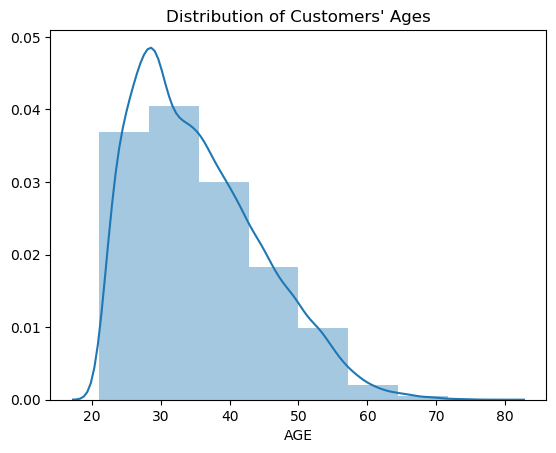

In [238]:
# Distribution of AGE (8 bins), with an overlay of a density plot  

age_dist = sns.distplot(credit['AGE'], bins=8)
age_dist.set_title("Distribution of Customers' Ages")


Text(0.5, 1.0, "Distribution of Customers' Limit Balance")

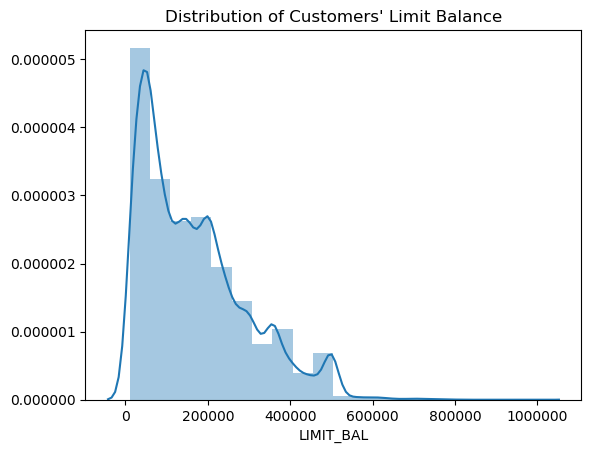

In [239]:
# Distribution of LIMIT_BAL (20 bins), with an overlay of a density plot  

age_dist = sns.distplot(credit['LIMIT_BAL'], bins=20)
age_dist.set_title("Distribution of Customers' Limit Balance")


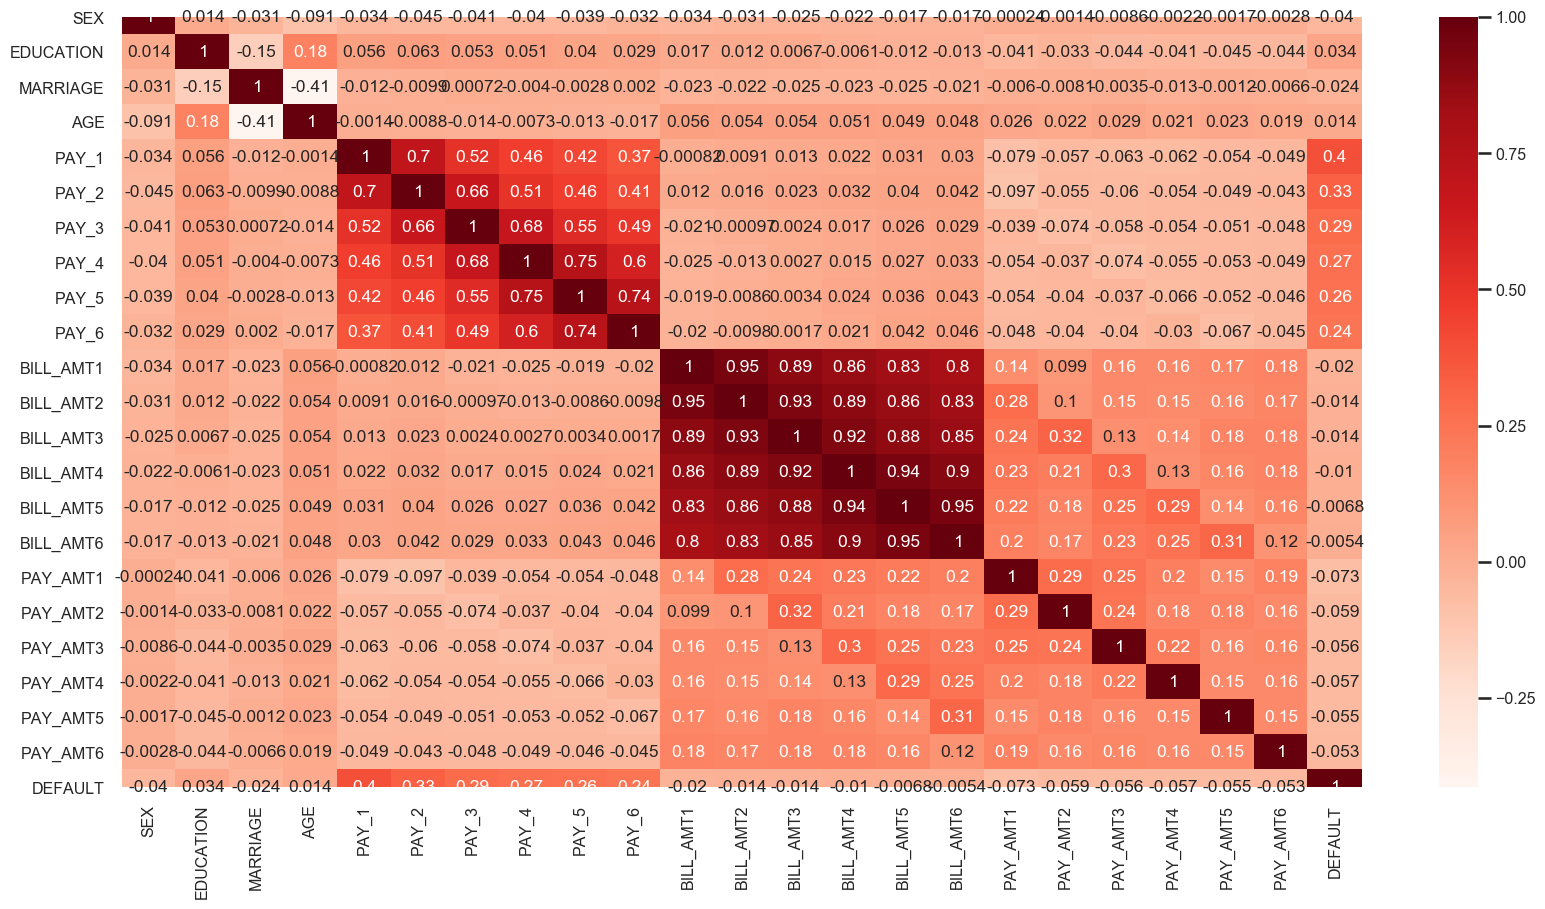

In [240]:
# Correlation - Higher correlation of DEFAULT with History of past payments PAY_1, PAY_2, ..... PAY_6

sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(credit.iloc[:,1:].corr(), cmap='Reds', annot=True);


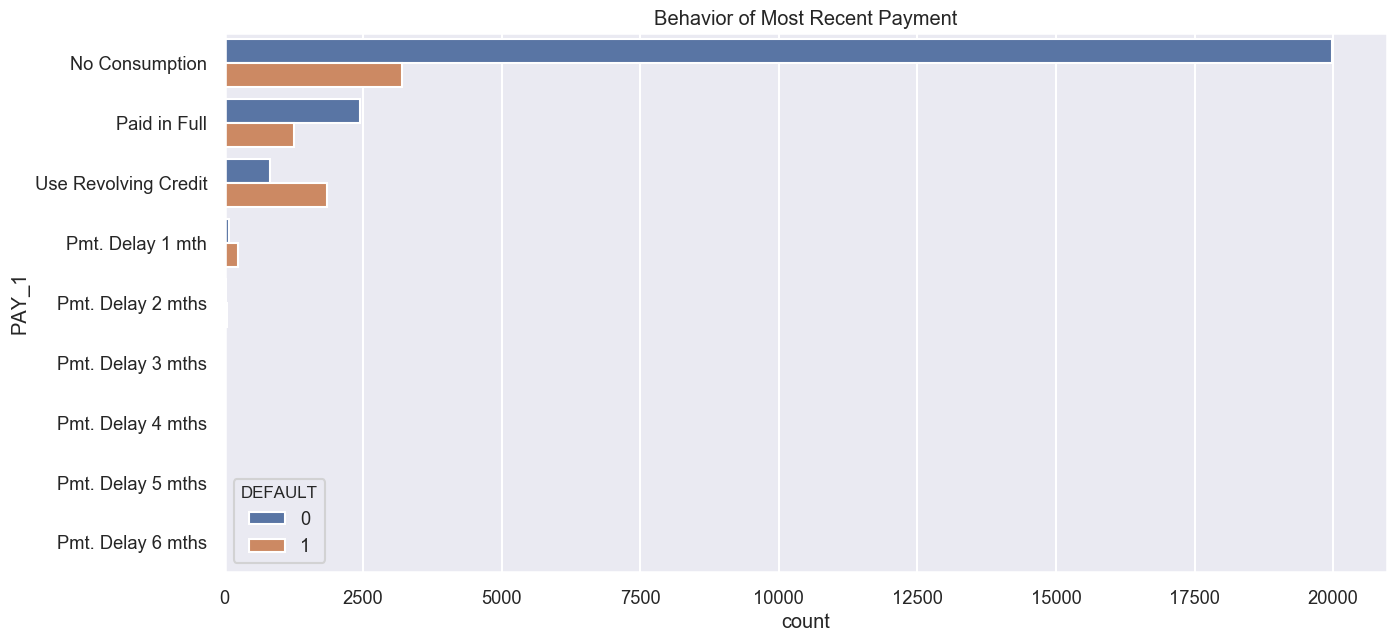

In [241]:
# Plot for PAY_1 (behavior of most recent payment)

sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="PAY_1", hue='DEFAULT', data=credit)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Pmt. Delay 1 mth','Pmt. Delay 2 mths'
                     ,'Pmt. Delay 3 mths','Pmt. Delay 4 mths','Pmt. Delay 5 mths','Pmt. Delay 6 mths','Pmt. Delay 7 mths','Pmt. Delay 8 mths'])
pay1.set_title('Behavior of Most Recent Payment')

plt.show()


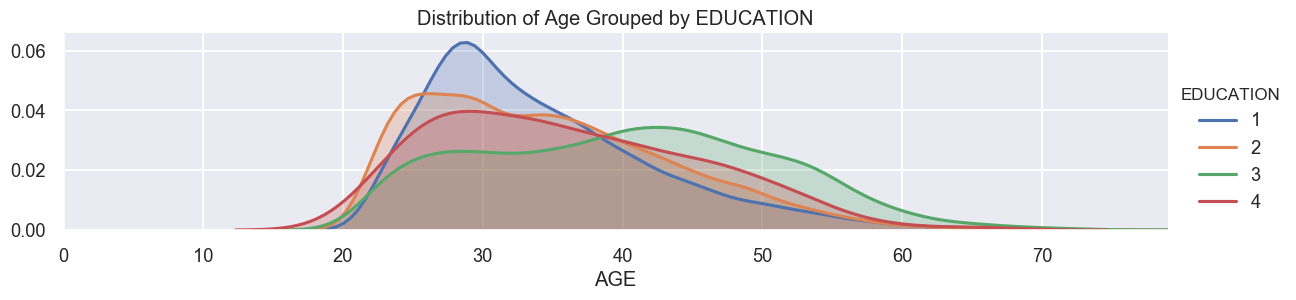

In [242]:
# kde plot of Distribution of Customers' Ages

fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by EDUCATION')
fig.add_legend()


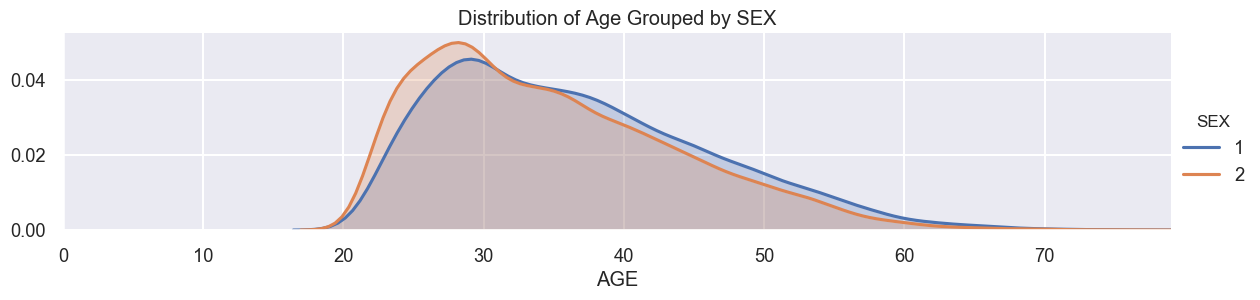

In [243]:
# kde plot of Distribution of Customers' Ages

fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by SEX')
fig.add_legend()


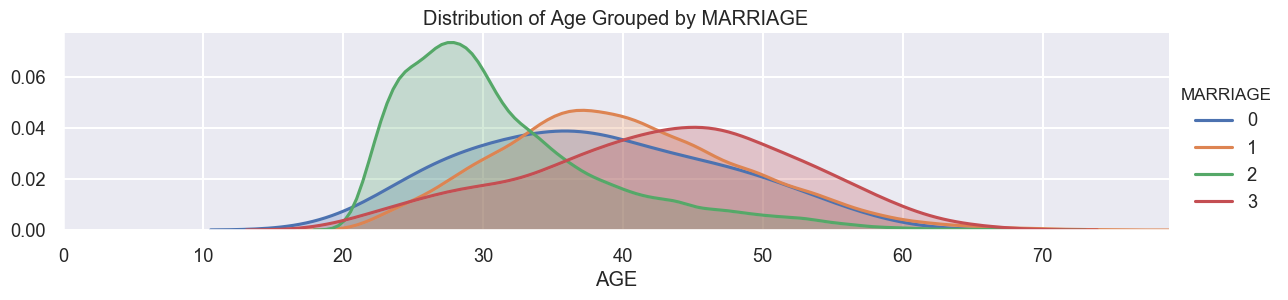

In [244]:
# kde plot of Distribution of Customers' Ages

fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by MARRIAGE')
fig.add_legend()


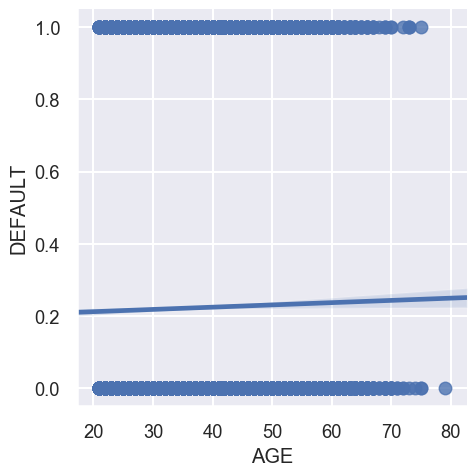

In [245]:
# Linear plot of AGE vs. DEFAULT (trend: Older AGE a higher rate of DEFAULT)

sns.lmplot('AGE', 'DEFAULT', data=credit)


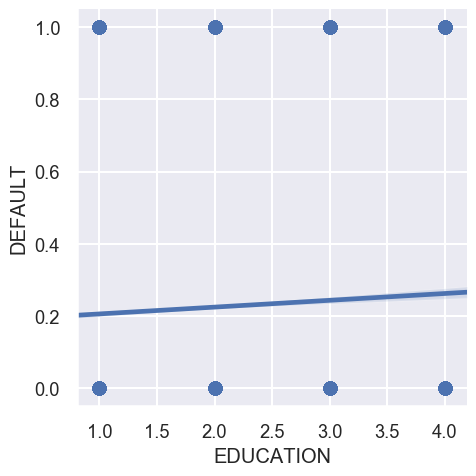

In [246]:
# Linear plot of EDUCATION vs. DEFAULT (trend: Less EDUCATION a higher rate of DEFAULT)

sns.lmplot('EDUCATION', 'DEFAULT', data=credit)


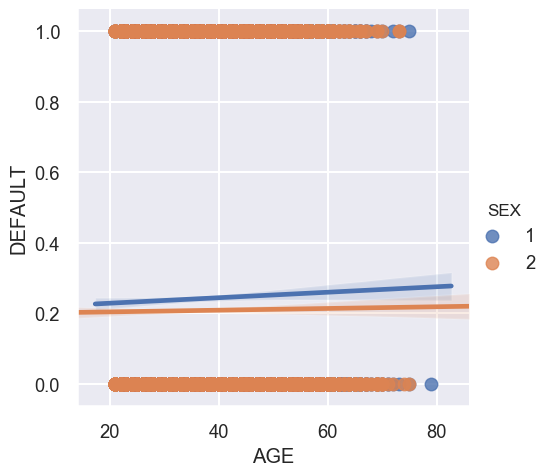

In [247]:
# Linear plot of AGE vs. DEFAULT (trend: Older AGE a higher rate of DEFAULT with SEX as a fector, Male riskier that Female)

sns.lmplot('AGE', 'DEFAULT', data=credit, hue='SEX')


In [248]:
# Define a function to loop through 6 values and form the attribute/feature name

def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

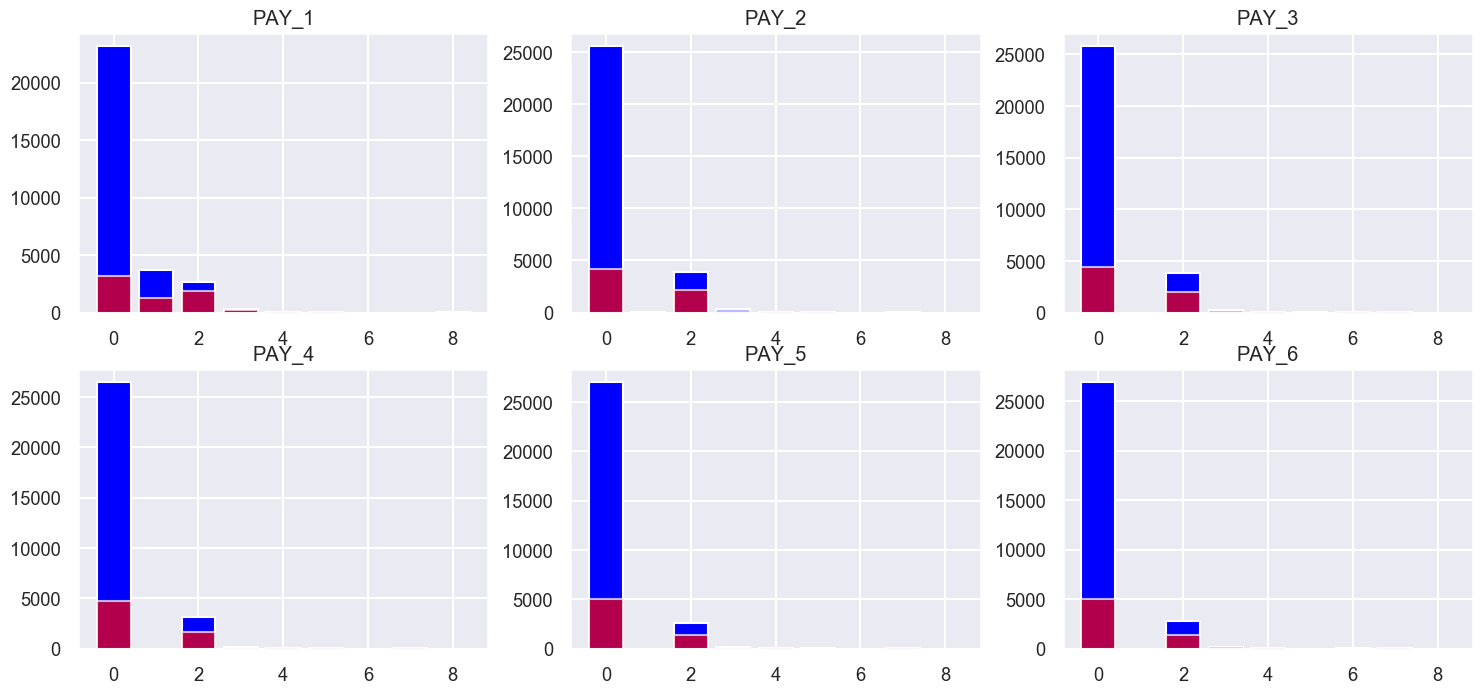

In [249]:
# Use defined getColumnsNames function to loop through 'PAY_1' to 'PAY_6' and compare to DEFAULT 

pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d = credit[pay_status_columns[i]].value_counts()
    x = credit[pay_status_columns[i]][(credit['DEFAULT']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='blue')
    ax[row,col].bar(x.index, x, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
    

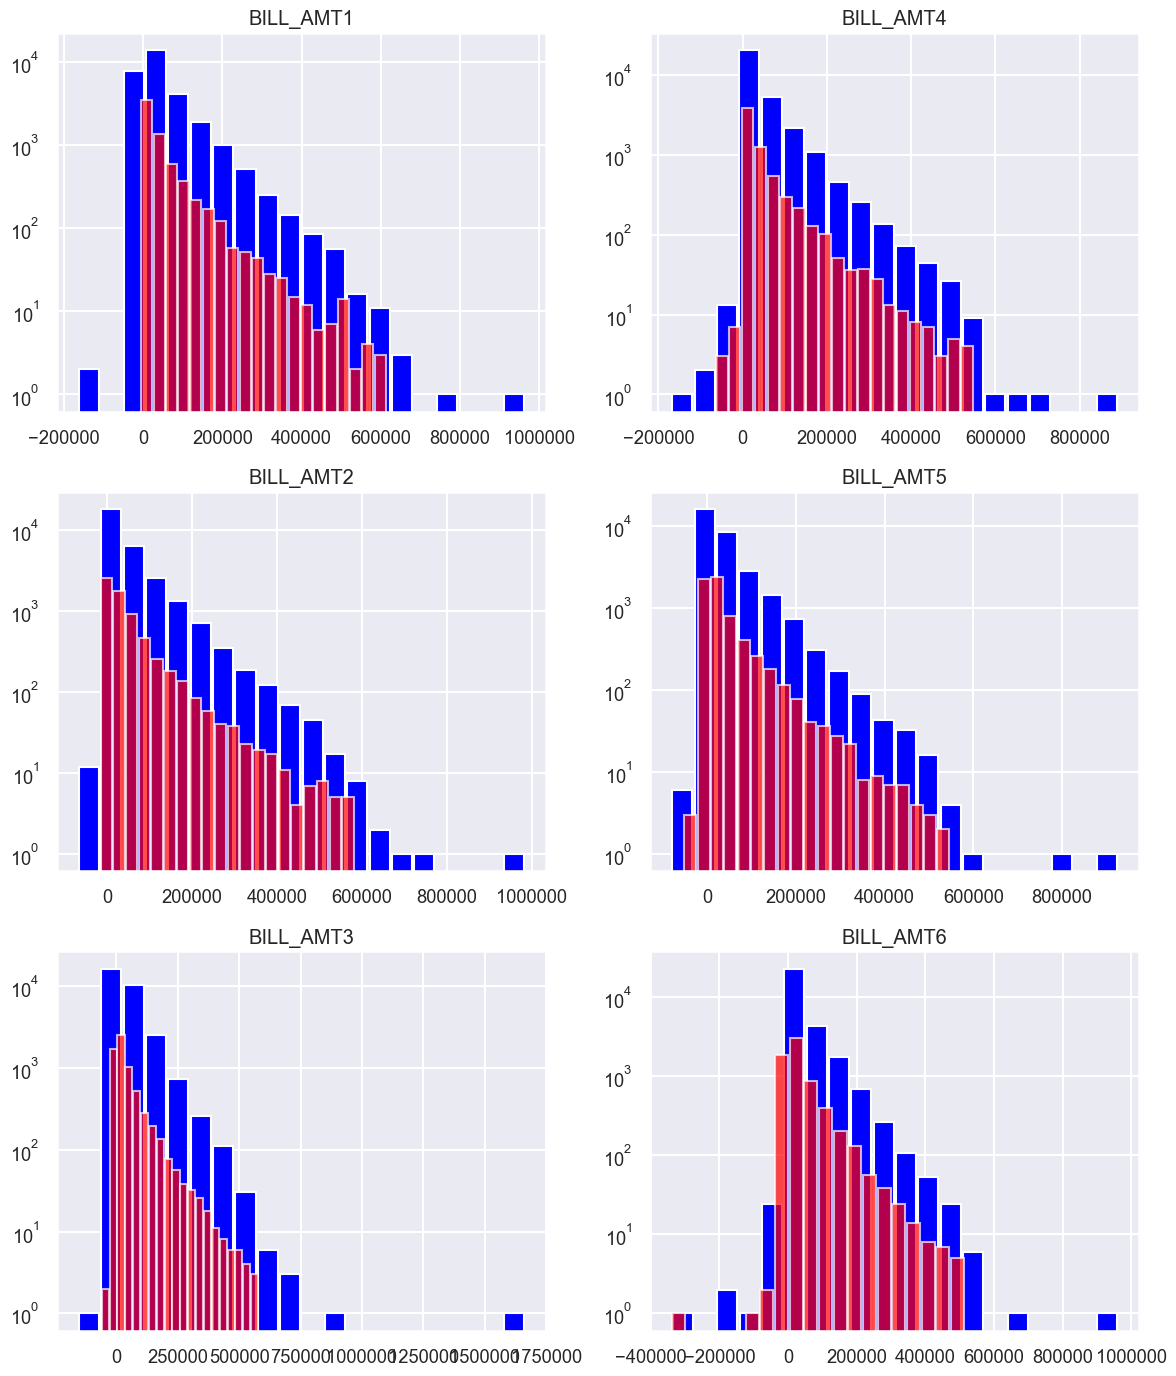

In [250]:
# Use defined getColumnsNames function to loop through 'BILL_AMT1' to 'BILL_AMT6' and compare to DEFAULT

bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(12,14)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[bill_atm_columns[i]], 20,rwidth=0.9, color ='blue')
    ax[row,col].hist(credit[bill_atm_columns[i]][(credit['DEFAULT']==1)],20,rwidth=0.9,color='red',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])

    # scaling graph
    ax[row,col].set_yscale('log', nonposy='clip')

    plt.tight_layout()
plt.show()



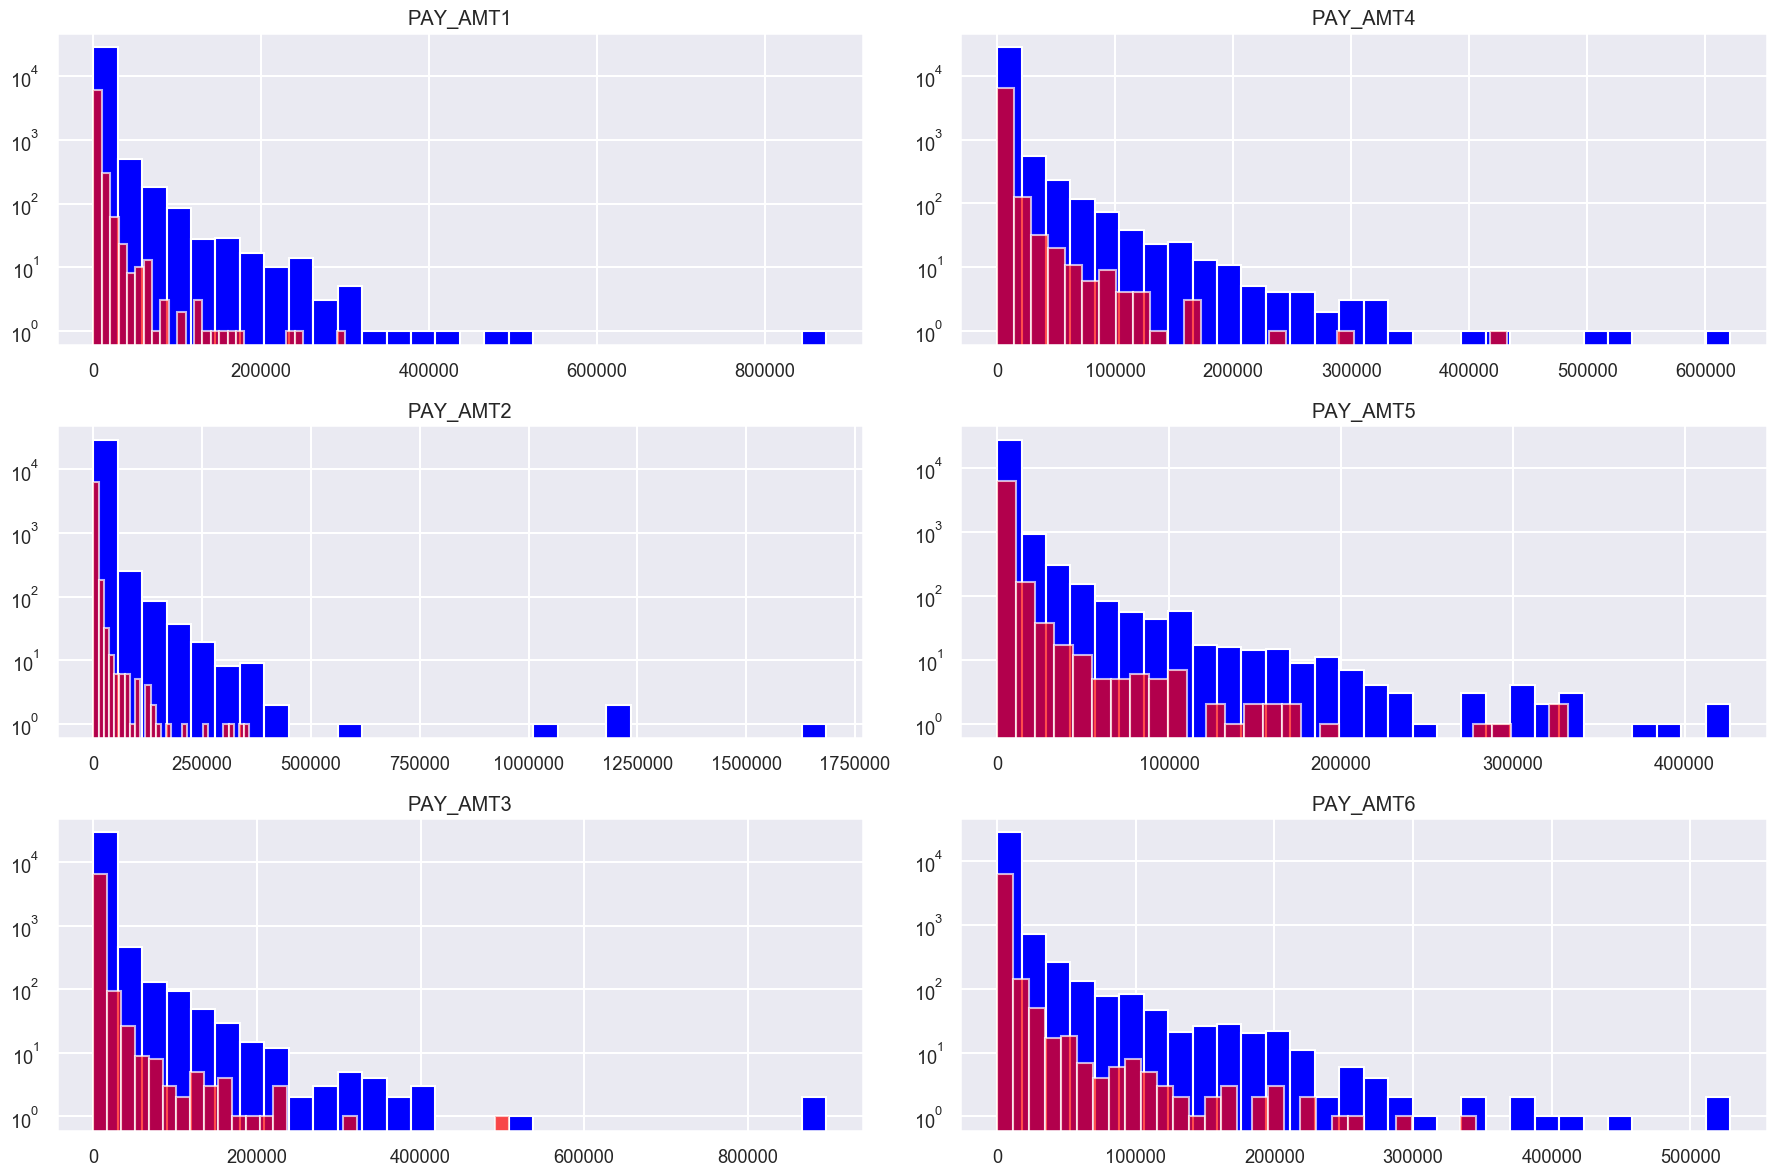

In [251]:
# Use defined getColumnsNames function to loop through 'PAY_AMT1' to 'PAY_AMT6' and compare to DEFAULT

pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,12)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[pay_amt_columns[i]], 30, color ='blue')
    ax[row,col].hist(credit[pay_amt_columns[i]][(credit['DEFAULT']==1)],30,color='red',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])

    # scaling graph
    ax[row,col].set_yscale('log', nonposy='clip')
    
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'AGE')

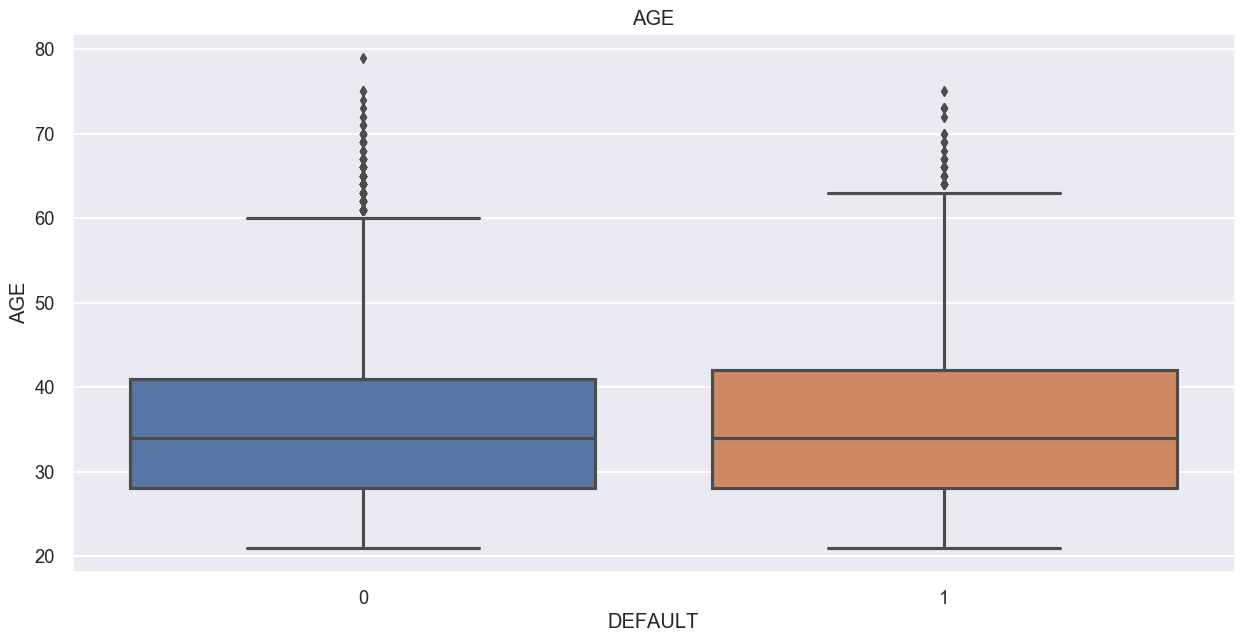

In [252]:
# Plot DEFAULT / AGE

sns.boxplot(x='DEFAULT',y='AGE',data=credit).set_title('AGE')


Text(0.5, 1.0, 'SEX')

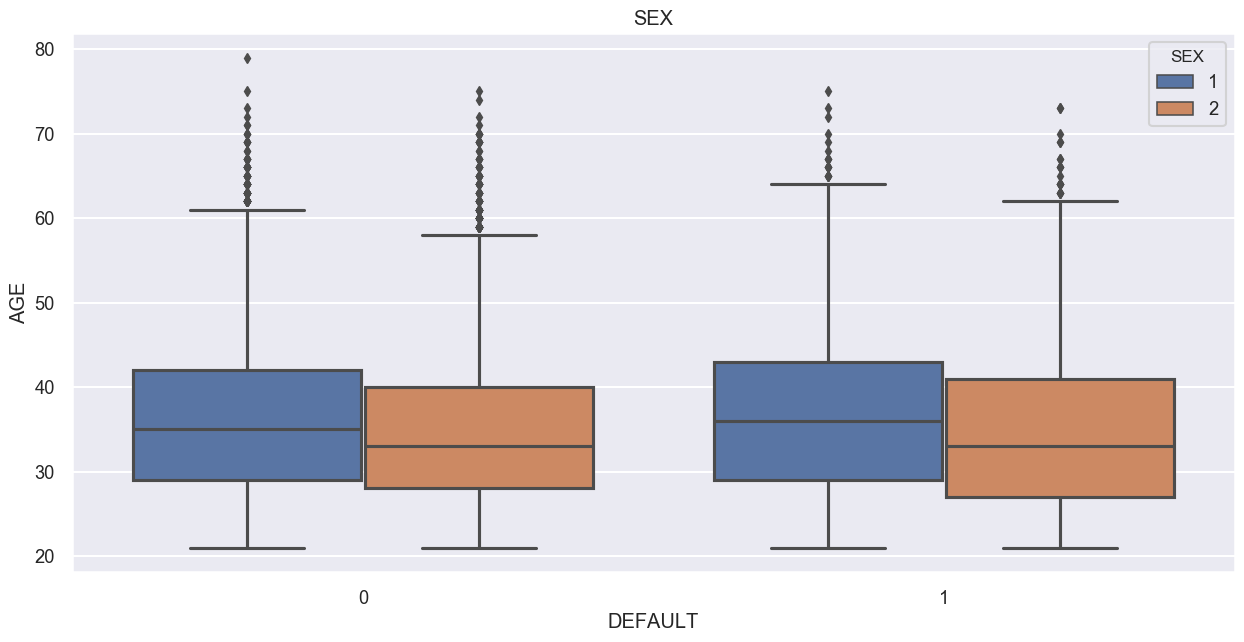

In [253]:
# Plot DEFAULT / SEX

sns.boxplot(x='DEFAULT',hue='SEX', y='AGE',data=credit).set_title('SEX')


Text(0.5, 1.0, 'EDUCATION: 1-Graduate School, 2-University, 3-High School, 4-Other')

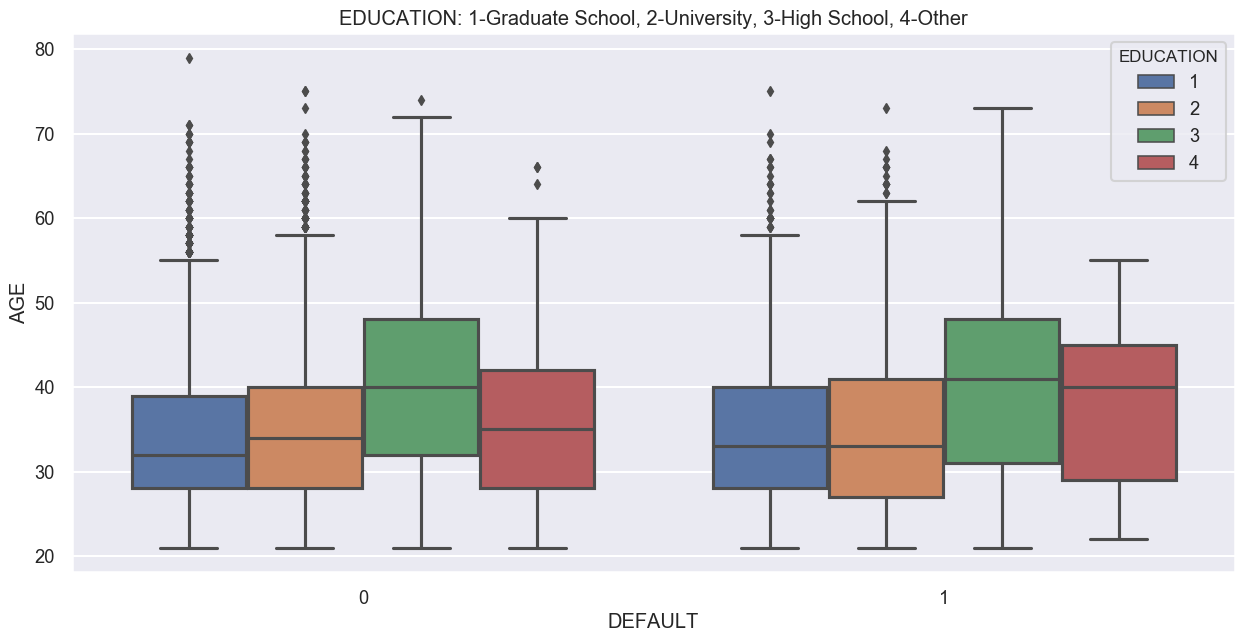

In [254]:
# Plot DEFAULT / EDUCATION

sns.boxplot(x='DEFAULT',hue='EDUCATION', y='AGE',data=credit).set_title('EDUCATION: 1-Graduate School, 2-University, 3-High School, 4-Other')


Text(0.5, 1.0, 'MARRIAGE: 0-Others, 1-Married, 2-Single, 3-Divorce')

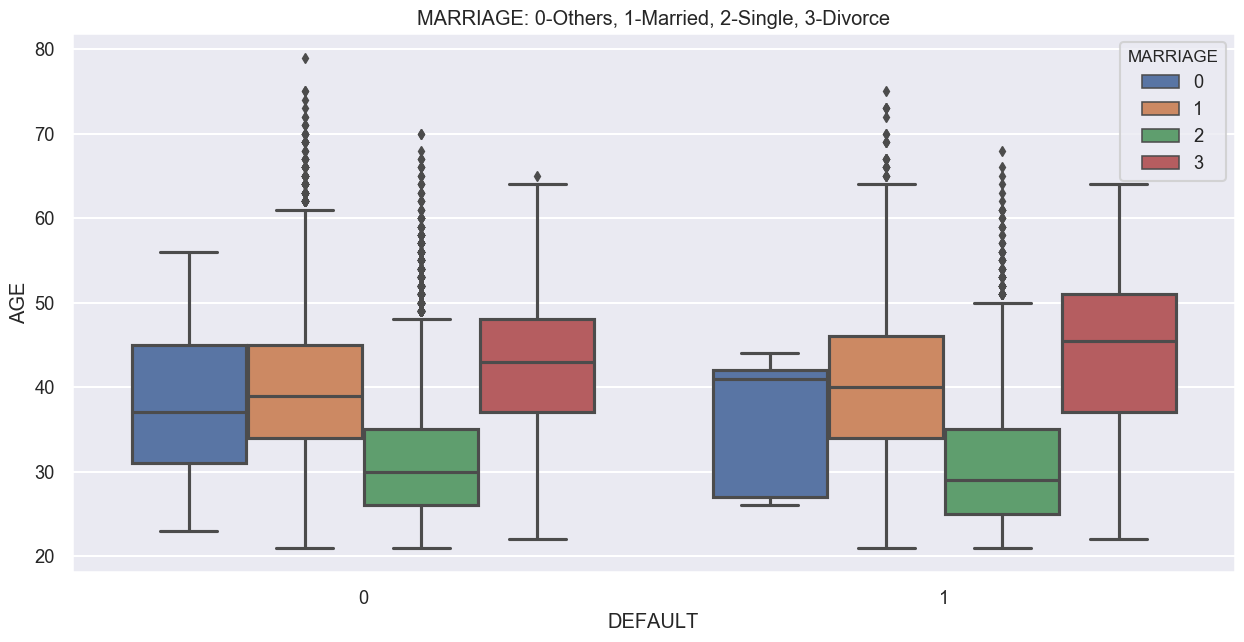

In [255]:
# Plot DEFAULT / MARRIAGE

sns.boxplot(x='DEFAULT',hue='MARRIAGE', y='AGE',data=credit).set_title('MARRIAGE: 0-Others, 1-Married, 2-Single, 3-Divorce')


#### Feature Engineering

In [256]:
# Create a backup of credit dataframe

credit_bkp_20200526_2255 = credit

In [257]:
# Review backup 'credit_bkp_20200526_2255'

credit_bkp_20200526_2255
    

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [315]:
# Create test dataframe for Feature Engineering RFE

creditTest = credit


In [316]:
creditTest

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [317]:
# Confirm integrity of 'credit' original dataframe

credit


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [467]:
# Select the Features

featuresT = creditTest.iloc[:,0:23]


In [469]:
# Review features selected

featuresT


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,0,0,0,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,0,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,0,0,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,0,0,0,0,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,0,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [318]:
# Select the Dependent Variable

depVarT = creditTest['DEFAULT']


In [471]:
# Review dependent variable

depVarT


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64

In [472]:
# create training and testing vars

X_trainT, X_testT, y_trainT, y_testT = train_test_split(featuresT, depVarT, test_size=0.3)
print (X_trainT.shape, y_trainT.shape)
print (X_testT.shape, y_testT.shape)


(21000, 23) (21000,)
(9000, 23) (9000,)


In [473]:
# Size of training set

len(X_trainT)


21000

In [474]:
# Size of testing set

len(X_testT)


9000

In [475]:
X_trainT

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7631,230000,2,2,1,28,0,0,0,0,0,...,0,1012,0,753,1716,0,1012,0,753,7600
16642,50000,1,1,2,33,1,2,2,2,0,...,9602,9304,10835,11658,0,3000,0,2000,1000,1500
27681,60000,2,2,1,23,0,0,0,0,2,...,43427,30408,30632,30021,2230,2000,4300,1000,0,2000
24114,300000,1,2,1,29,0,0,0,0,0,...,12214,27299,0,0,3000,5000,21312,0,0,0
15209,70000,2,2,1,27,0,0,2,2,2,...,72616,68201,50995,48822,6800,3100,15,3850,0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,50000,1,2,2,40,0,0,0,0,0,...,13957,16703,17052,17391,1218,1254,3000,617,621,643
23505,120000,2,2,2,33,1,2,2,2,2,...,68592,72525,73741,72440,3500,0,5700,3000,0,3000
11482,100000,2,2,1,47,0,0,0,0,0,...,31028,33544,35328,41835,3000,2028,3354,2328,7300,0
17533,50000,2,2,1,43,0,0,2,2,0,...,21188,20550,21209,21713,3000,2000,0,1000,1000,1000


In [476]:
X_testT

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
18021,30000,1,3,1,44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2355,90000,1,2,2,25,0,0,0,0,0,...,2422,1051,1051,83573,1052,2422,0,1051,83573,3098
27219,150000,1,3,1,42,0,0,0,0,0,...,151864,147485,106607,98109,6000,6012,5012,5000,4000,4000
18637,200000,2,2,2,24,0,0,0,0,0,...,233553,206398,145825,140249,8271,8182,6576,5073,5095,5172
11208,150000,1,1,1,46,0,0,0,0,0,...,99263,100920,86781,71408,4555,3500,3300,3027,3000,2700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,30000,2,2,2,38,0,0,0,0,2,...,24124,27012,26279,26831,1676,1725,3613,0,975,980
15874,50000,2,2,2,35,0,0,0,0,0,...,15694,16431,17056,17581,1550,1700,1300,900,800,800
5337,50000,2,2,1,31,0,0,0,0,0,...,29253,14199,14965,15712,2450,2100,1000,1000,1000,1000
26112,720000,2,2,2,38,1,0,0,0,0,...,1744,7323,711,970,2184,1744,7323,711,970,491


#### Principal Component Analysis


In [477]:
# Import modules neeeded

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [478]:
from sklearn.preprocessing import StandardScaler

# standardizing the datasets
sc = StandardScaler()
X_trainT = sc.fit_transform(X_trainT)
X_testT = sc.transform(X_testT)

In [479]:
# Applying PCA

from sklearn.decomposition import PCA

# components = All
pcaAll = PCA()

principalComponents = pcaAll.fit_transform(X_trainT)


In [482]:
# Verifying PCA applied

principalComponents.shape



(21000, 23)

In [483]:
# explained variance ratio will all features

explained_varianceAll = pcaAll.explained_variance_ratio_

explained_varianceAll


array([0.25729537, 0.17119319, 0.06618225, 0.06572118, 0.04515003,
       0.04399809, 0.0417061 , 0.04047664, 0.0391099 , 0.0375977 ,
       0.03665937, 0.03347599, 0.02576973, 0.02337051, 0.02094298,
       0.01462555, 0.01119407, 0.01069862, 0.00801358, 0.00295823,
       0.0018011 , 0.00105721, 0.00100262])

(80 % percent of the classification information contained in the feature set is accounted by the first 10 principal components)

In [484]:
# Selecting the 10 principal components

# components = 10
pca = PCA(n_components=10)

X_trainT = pca.fit_transform(X_trainT)
X_testT = pca.transform(X_testT)


In [485]:
X_trainT.shape

(21000, 10)

In [486]:
X_testT.shape

(9000, 10)

#### Training and Making Predictions

Random Forest

In [487]:
# Using Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_trainT, y_trainT)

# Predicting the Test set results
y_predTrfc = rfc.predict(X_testT)

In [488]:
# Confusion matrix

cmrfc = confusion_matrix(y_testT, y_predTrfc)
cmrfc


array([[7013,   16],
       [1947,   24]], dtype=int64)

In [489]:
# Obtaining Metrics

accrfc = accuracy_score(y_testT, y_predTrfc)
print('Accuracy rfc: ' + str(accuracy_score(y_testT, y_predTrfc)))
precrfc = precision_score(y_testT, y_predTrfc)
print('Precision rfc: ' + str(precision_score(y_testT, y_predTrfc)))
recrfc = recall_score(y_testT, y_predTrfc)
print('Recall rfc: ' + str(recall_score(y_testT, y_predTrfc)))


Accuracy rfc: 0.7818888888888889
Precision rfc: 0.6
Recall rfc: 0.0121765601217656


In [490]:
# Using Random Forest - Tuning parameters max_depth and n_estimators 

from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)
rfc2.fit(X_trainT, y_trainT)

# Making predictions
y_predTrfc2 = rfc2.predict(X_testT)

In [491]:
# Confusion matrix

cmrfc2 = confusion_matrix(y_testT, y_predTrfc2)
cmrfc2

array([[6889,  140],
       [1706,  265]], dtype=int64)

In [492]:
# Obtaining Metrics

accrfc2 = accuracy_score(y_testT, y_predTrfc2)
print('Accuracy rfc2: ' + str(accuracy_score(y_testT, y_predTrfc2)))
precrfc2 = precision_score(y_testT, y_predTrfc2)
print('Precision rfc2: ' + str(precision_score(y_testT, y_predTrfc2)))
recrfc2 = recall_score(y_testT, y_predTrfc2)
print('Recall rfc2: ' + str(recall_score(y_testT, y_predTrfc2)))


Accuracy rfc2: 0.7948888888888889
Precision rfc2: 0.654320987654321
Recall rfc2: 0.13444951801116184


Support Vector Machine

In [493]:
# Using Support Vector Machine (SVC) Support Vector Classification 

from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_trainT, y_trainT)

# Making predictions
y_predTsvc = svc.predict(X_testT)


In [494]:
# Confusion matrix

cmsvc = confusion_matrix(y_testT, y_predTsvc)
cmsvc


array([[6712,  317],
       [1365,  606]], dtype=int64)

In [495]:
# Obtaining Metrics

accsvc = accuracy_score(y_testT, y_predTsvc)
print('Accuracy svc: ' + str(accuracy_score(y_testT, y_predTsvc)))
precsvc = precision_score(y_testT, y_predTsvc)
print('Precision svc: ' + str(precision_score(y_testT, y_predTsvc)))
recsvc = recall_score(y_testT, y_predTsvc)
print('Recall svc: ' + str(recall_score(y_testT, y_predTsvc)))

Accuracy svc: 0.8131111111111111
Precision svc: 0.656554712892741
Recall svc: 0.3074581430745814


In [496]:
# Using Support Vector Machine (SVC) Support Vector Classification - Tuning Parameters (kernel and degree)

from sklearn.svm import SVC
svc2 = SVC(kernel = 'poly', degree = 5, random_state = 0)
svc2.fit(X_trainT, y_trainT)

# Making predictions
y_predTsvc2 = svc2.predict(X_testT)


In [497]:
# Confusion matrix

cmsvc2 = confusion_matrix(y_testT, y_predTsvc2)
cmsvc2


array([[6744,  285],
       [1524,  447]], dtype=int64)

In [498]:
# Obtaining Metrics

accsvc2 = accuracy_score(y_testT, y_predTsvc2)
print('Accuracy svc2: ' + str(accuracy_score(y_testT, y_predTsvc2)))
precsvc2 = precision_score(y_testT, y_predTsvc2)
print('Precision svc2: ' + str(precision_score(y_testT, y_predTsvc2)))
recsvc2 = recall_score(y_testT, y_predTsvc2)
print('Recall svc2: ' + str(recall_score(y_testT, y_predTsvc2)))

Accuracy svc2: 0.799
Precision svc2: 0.610655737704918
Recall svc2: 0.2267884322678843


K-Nearest Neighbor

In [499]:
# Using KNN (K-Nearest Neighbor)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_trainT, y_trainT)

# Making predictions
y_predTknn = knn.predict(X_testT)


In [500]:
# Confusion matrix

cmknn = confusion_matrix(y_testT, y_predTknn)
cmknn


array([[6400,  629],
       [1283,  688]], dtype=int64)

In [501]:
# Obtaining Metrics

accknn = accuracy_score(y_testT, y_predTknn)
print('Accuracy knn: ' + str(accuracy_score(y_testT, y_predTknn)))
precknn = precision_score(y_testT, y_predTknn)
print('Precision knn: ' + str(precision_score(y_testT, y_predTknn)))
recknn = recall_score(y_testT, y_predTknn)
print('Recall knn: ' + str(recall_score(y_testT, y_predTknn)))


Accuracy knn: 0.7875555555555556
Precision knn: 0.5223993925588458
Recall knn: 0.34906139015728055


In [502]:
# Using KNN (K-Nearest Neighbour) - Tuning Parameters (n_neighbors and weights)-

from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn2.fit(X_trainT,y_trainT)

# Making predictions
y_predTknn2 = knn2.predict(X_testT)

In [503]:
# Confusion matrix

cmknn2 = confusion_matrix(y_testT, y_predTknn2)
cmknn2


array([[6525,  504],
       [1289,  682]], dtype=int64)

In [504]:
# Obtaining Metrics

accknn2 = accuracy_score(y_testT, y_predTknn2)
print('Accuracy knn2: ' + str(accuracy_score(y_testT, y_predTknn2)))
precknn2 = precision_score(y_testT, y_predTknn2)
print('Precision knn2: ' + str(precision_score(y_testT, y_predTknn2)))
recknn2 = recall_score(y_testT, y_predTknn2)
print('Recall knn2: ' + str(recall_score(y_testT, y_predTknn2)))


Accuracy knn2: 0.8007777777777778
Precision knn2: 0.5750421585160203
Recall knn2: 0.34601725012683915


#### Model Evaluation

In [505]:
# Model Results

# Models that perfrom better

# Random Forest
model_results =  pd.DataFrame([['Random Forest', accrfc, precrfc, recrfc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall'])
model_results = model_results.append(pd.DataFrame([['Random Forest Tuned', accrfc2, precrfc2, recrfc2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall']), ignore_index = True)

# Support Vector Classification
#model_results = model_results.append(resultssvm, ignore_index = True)
model_results = model_results.append(pd.DataFrame([['Support Vector Classification', accsvc, precsvc, recsvc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall']), ignore_index = True)
model_results = model_results.append(pd.DataFrame([['Support Vector Classification Tuned', accsvc2, precsvc2, recsvc2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall']), ignore_index = True)

# K-Nearest Neighbor Tuned
#model_results = model_results.append(resultsknn2, ignore_index = True)
model_results = model_results.append(pd.DataFrame([['K-Nearest Neighbor', accknn, precknn, recknn]], columns = ['Model', 'Accuracy', 'Precision', 'Recall']), ignore_index = True)
model_results = model_results.append(pd.DataFrame([['K-Nearest Neighbor Tuned', accknn2, precknn2, recknn2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall']), ignore_index = True)

# Results
model_results


,Model,Accuracy,Precision,Recall
0,Random Forest,0.781889,0.600000,0.012177
1,Random Forest Tuned,0.794889,0.654321,0.134450
2,Support Vector Classification,0.813111,0.656555,0.307458
3,Support Vector Classification Tuned,0.799000,0.610656,0.226788
4,K-Nearest Neighbor,0.787556,0.522399,0.349061
5,K-Nearest Neighbor Tuned,0.800778,0.575042,0.346017


Model Evaluation - Metrics for performance evaluation

In [506]:
# Saving Session

import dill
dill.dump_session('notebook_creditone_20200512_2228.db')
